In [1]:
import numpy as np
import cvxpy as cvx
from pathlib import Path
import matplotlib.pyplot as plt

from solardatatools.signal_decompositions import l1_l2d2p365, tl1_l2d2p365
from solardatatools.utilities import basic_outlier_filter

In [2]:
# Import data
fixtures_path = "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/tests/fixtures/"

data_file_path = Path(fixtures_path + "clear_day_detection/one_year_power_signals_1.csv")

with open(data_file_path) as file:
    data = np.loadtxt(file, delimiter=",")
expected_data_file_path = Path(fixtures_path + "clear_day_detection/one_year_weights_1.csv")

with open(expected_data_file_path) as file:
    expected_output = np.loadtxt(file, delimiter=",")

In [3]:
# original: 0.5% of 100%
daily_sparsity = np.sum(data > 0.005 * np.max(data), axis=0)/288
filtered_signal = l1_l2d2p365(daily_sparsity, c1=6e3, solver="MOSEK")

In [4]:
# new, 2% of 95%
# tau=.85 or .9 and 85th perc

nans = np.isnan(data)
capacity_est = np.quantile(data[~nans], 0.95)
data_copy = np.copy(data)
data_copy[nans] = 0.0

foo = data_copy > 0.02 * capacity_est # 2% of 95th perc
density_signal = np.sum(foo, axis=0) / data.shape[0]
use_days = np.logical_and(density_signal > 0.2, density_signal < 0.8)

new_fit_signal = tl1_l2d2p365(density_signal, c1=6e3, use_ixs=use_days, tau=0.85, solver="MOSEK")

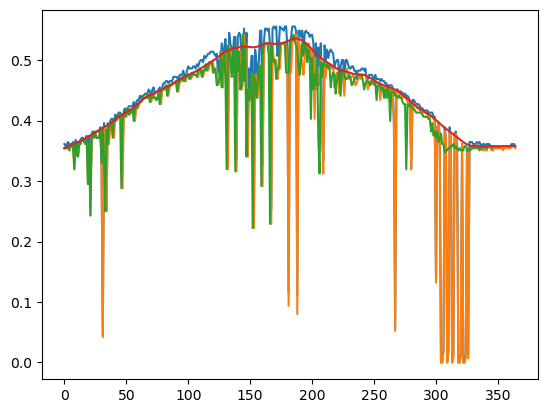

In [5]:
plt.plot(daily_sparsity)
plt.plot(density_signal)
plt.plot(density_signal[use_days])
plt.plot(new_fit_signal)

Text(0.5, 1.0, 'Daily Sparsity Data')

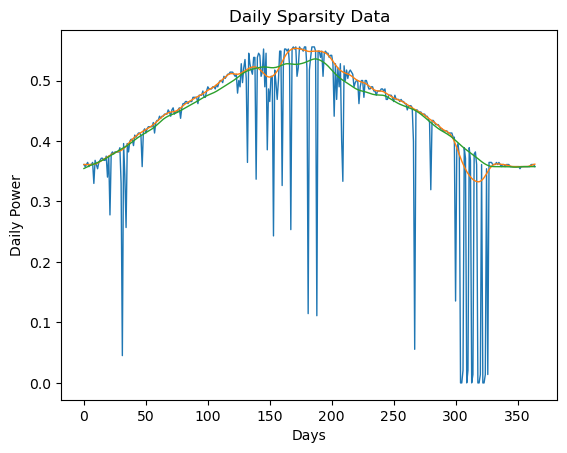

In [6]:
plt.plot(daily_sparsity, linewidth=1);
plt.plot(filtered_signal, linewidth=1);
plt.plot(new_fit_signal, linewidth=1);


plt.ylabel("Daily Power")
plt.xlabel("Days")
plt.title("Daily Sparsity Data")

Text(0.5, 1.0, 'Daily Sparsity Data')

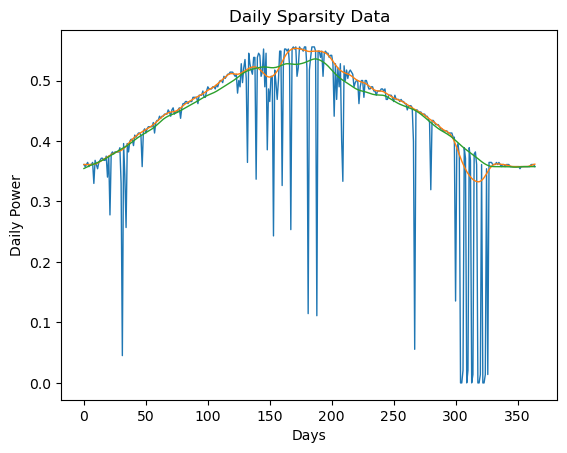

In [7]:
plt.plot(daily_sparsity, linewidth=1);
plt.plot(filtered_signal, linewidth=1);
plt.plot(new_fit_signal, linewidth=1);


plt.ylabel("Daily Power")
plt.xlabel("Days")
plt.title("Daily Sparsity Data")

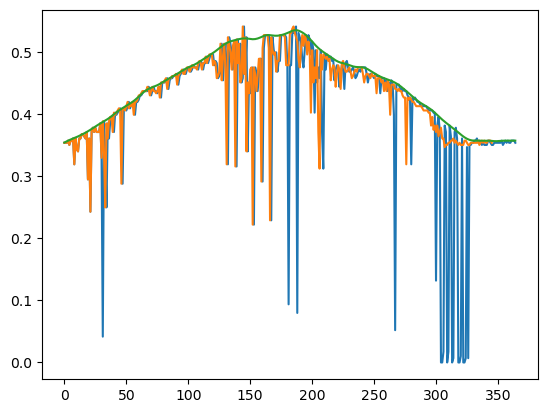

In [8]:
plt.plot(density_signal)
plt.plot(density_signal[use_days])
plt.plot(new_fit_signal)

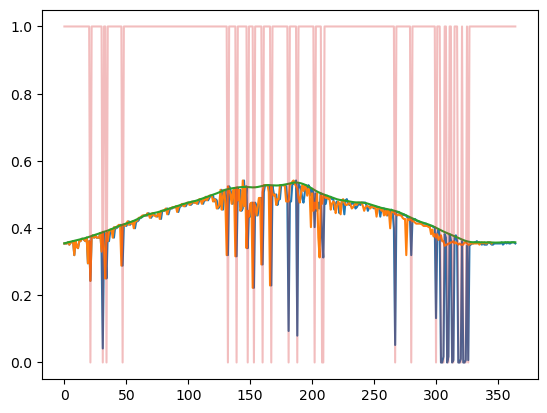

In [9]:
# results
mask1 = basic_outlier_filter(density_signal - new_fit_signal, outlier_constant=5.0)

plt.plot(density_signal)
plt.plot(density_signal[use_days])
plt.plot(new_fit_signal)
plt.plot(mask1, alpha=0.3)

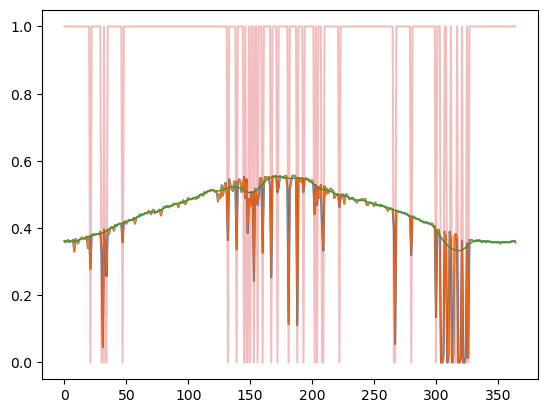

In [10]:
# results
mask2 = basic_outlier_filter(daily_sparsity - filtered_signal, outlier_constant=5.0)

plt.plot(daily_sparsity)
plt.plot(daily_sparsity, linewidth=1);
plt.plot(filtered_signal, linewidth=1);
plt.plot(mask2, alpha=0.3)

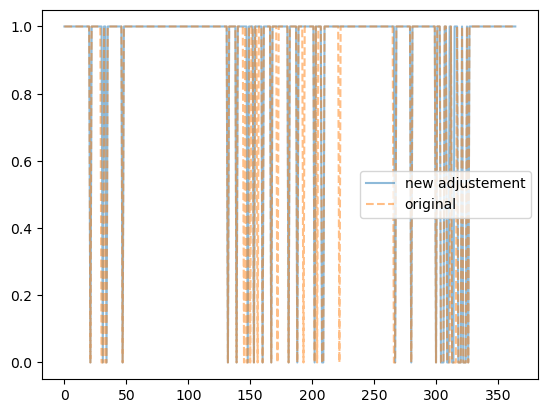

In [11]:
plt.plot(mask1, alpha=0.5, label="new adjustement")
plt.plot(mask2, alpha=0.5, linestyle="--", label="original")
plt.legend();